In [1]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Data\ Science\ Projects/Real\ Time\ Emotion\ Detection/Data/archive.zip -d /content/data


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/sad/Training_65242339.jpg  
  inflating: /content/data/train/sad/Training_65267116.jpg  
  inflating: /content/data/train/sad/Training_65275626.jpg  
  inflating: /content/data/train/sad/Training_6529266.jpg  
  inflating: /content/data/train/sad/Training_65329617.jpg  
  inflating: /content/data/train/sad/Training_65338712.jpg  
  inflating: /content/data/train/sad/Training_65338797.jpg  
  inflating: /content/data/train/sad/Training_65387162.jpg  
  inflating: /content/data/train/sad/Training_65404494.jpg  
  inflating: /content/data/train/sad/Training_65426218.jpg  
  inflating: /content/data/train/sad/Training_65430136.jpg  
  inflating: /content/data/train/sad/Training_65437377.jpg  
  inflating: /content/data/train/sad/Training_6545735.jpg  
  inflating: /content/data/train/sad/Training_65463385.jpg  
  inflating: /content/data/train/sad/Training_65473985.jpg  
  inflating: /content/data/train/sad

Labels:

0 - angry

1 - disgust

2 - fear

3 - happy

4 - neutral

5 - sad

6 - surprise

# Real Time Emotion Detection

### We are going to use Tensorflow's pre-built model names MobileNet and OpenCV to build an application which will detect and monitor the emotions of a person in real time.

In [3]:
# importing all the libraries we will be using
import tensorflow as tf #We will use this to access the pre-build model "MobileNet" ad also changing the layers appropriate to our application
import cv2 #We will use this to handle the video input and get frames from the input while also displaying the output in the video input
import matplotlib.pyplot as plt #We will use this to plot the images we will use to train the data
%matplotlib inline
import os #We will be using this to get access to the directories
import numpy as np #We will use this to change the shape of the numpy arrays used and other operations which will be done on them

#### We're now going to look at the shape of the images we have using OpenCV

In [ ]:
test_img_array = cv2.imread("/content/data/test/angry/PrivateTest_10131363.jpg")
print(test_img_array)

[[[ 46  46  46]
  [ 34  34  34]
  [ 26  26  26]
  ...
  [ 10  10  10]
  [ 13  13  13]
  [ 22  22  22]]

 [[ 50  50  50]
  [ 28  28  28]
  [ 21  21  21]
  ...
  [ 11  11  11]
  [ 10  10  10]
  [ 21  21  21]]

 [[ 50  50  50]
  [ 27  27  27]
  [ 15  15  15]
  ...
  [ 22  22  22]
  [ 24  24  24]
  [ 22  22  22]]

 ...

 [[208 208 208]
  [179 179 179]
  [108 108 108]
  ...
  [191 191 191]
  [205 205 205]
  [204 204 204]]

 [[212 212 212]
  [198 198 198]
  [149 149 149]
  ...
  [181 181 181]
  [200 200 200]
  [204 204 204]]

 [[208 208 208]
  [201 201 201]
  [171 171 171]
  ...
  [165 165 165]
  [180 180 180]
  [189 189 189]]]


In [ ]:
test_img_array.shape

(48, 48, 3)

#### The images we have are of the shape (48, 48, 3) as we can see above. We now need to change that to match the input size for the pre-trained model MobileNet while also loading all the training dataset into a training array.

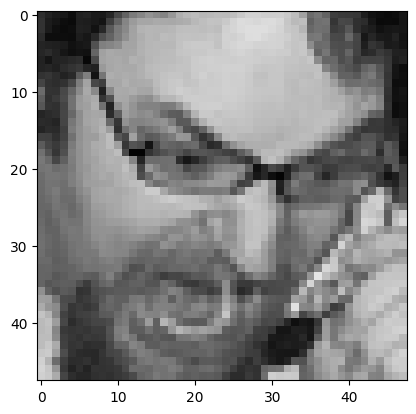

In [ ]:
#plotting the image
plt.imshow(test_img_array)

In [ ]:
Directory = "/content/data/train/"
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
#MobileNet uses input of the size (224, 224, 3) so we need to reshape the array sizes of the image to this.
img_size = 224
#An Example of how to do that
new_test_img = cv2.resize(test_img_array, (img_size, img_size))

In [ ]:
new_test_img.shape

(224, 224, 3)

In [ ]:
from posix import listdir
# Now we will do the same thing but to all the images in the training set and load them into a training set array.
trainingData = []

#function to load and resize the images
def loadResizeImg():
  for i in range(1, len(classes)):
    path = os.path.join(Directory, classes[i])
    class_num = i
    for img in listdir(path):
      img_array = cv2.imread(os.path.join(path, img))
      resized_img_arr = cv2.resize(img_array, (img_size, img_size))
      trainingData.append([resized_img_arr, class_num])

In [ ]:
loadResizeImg()

In [ ]:
trainingData

[[array([[[11, 11, 11],
          [11, 11, 11],
          [11, 11, 11],
          ...,
          [ 6,  6,  6],
          [ 6,  6,  6],
          [ 6,  6,  6]],
  
         [[11, 11, 11],
          [11, 11, 11],
          [11, 11, 11],
          ...,
          [ 6,  6,  6],
          [ 6,  6,  6],
          [ 6,  6,  6]],
  
         [[11, 11, 11],
          [11, 11, 11],
          [11, 11, 11],
          ...,
          [ 6,  6,  6],
          [ 6,  6,  6],
          [ 6,  6,  6]],
  
         ...,
  
         [[69, 69, 69],
          [69, 69, 69],
          [69, 69, 69],
          ...,
          [22, 22, 22],
          [22, 22, 22],
          [22, 22, 22]],
  
         [[69, 69, 69],
          [69, 69, 69],
          [69, 69, 69],
          ...,
          [22, 22, 22],
          [22, 22, 22],
          [22, 22, 22]],
  
         [[69, 69, 69],
          [69, 69, 69],
          [69, 69, 69],
          ...,
          [22, 22, 22],
          [22, 22, 22],
          [22, 22, 22]]], dtype=u

In [ ]:
print(len(trainingData))

24714


In [ ]:
#The training data list we have is in order which is bad for training a model so we need to shuffle it.
import random

random.shuffle(trainingData)

#### Now that we have the traning data set,  we need to divide it into features and labels and normalize the features so we can pass it into the pre-trained model and train it with this data.

In [ ]:
X = [] #features
y = [] #labels

for features, labels in trainingData:
  X.append(features)
  y.append(labels)

X

[array([[[26, 26, 26],
         [26, 26, 26],
         [26, 26, 26],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        [[26, 26, 26],
         [26, 26, 26],
         [26, 26, 26],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        [[26, 26, 26],
         [26, 26, 26],
         [26, 26, 26],
         ...,
         [13, 13, 13],
         [13, 13, 13],
         [13, 13, 13]],
 
        ...,
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [42, 42, 42],
         [42, 42, 42],
         [42, 42, 42]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [42, 42, 42],
         [42, 42, 42],
         [42, 42, 42]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [42, 42, 42],
         [42, 42, 42],
         [42, 42, 42]]], dtype=uint8),
 array([[[228, 228, 228],
         [228, 2

In [ ]:
#Right now, X is a list. But we need it to be a 4 - dimensional array so we reshape it using numpy.
X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape

(24714, 224, 224, 3)

#### We now have the training data as an array of size (24714, 224, 224, 3) which relate to (Number of images, height in pixels, width in pixels, color channels; red, green, blue here). Each section of this array contains values from 0 to 225 which denote how bright a pixel is at that spot. We now need to normalize this training data to values from 0 to 1. We can do that by dividing it by 225.0.

In [ ]:
batch_size = 1000
for start in range(0, len(X), batch_size):
    end = start + batch_size
    X[start:end] = X[start:end].astype('float16') / 225.0


In [ ]:
y = np.array(y)

#### We now have the data ready we just need to call the pre-built model and tune it to fit this dataset and predictions.

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [2]:
#calling the pre-built model
model = keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

#### Transfer Learning

#### We now have the model we will be suing for Transfer Learning. We will now be creating layers so that the model classifies only 7 categories that we have. You can see that currently it classifies the input into 1000 categaries.

In [3]:
model_input = model.layers[0].output
model_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>

In [4]:
model_output = model.layers[-2].output
model_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [5]:
final_output = layers.Dense(128, activation = 'relu')(model_output)
final_output = layers.Dense(64, activation='relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)
new_model = keras.Model(
      inputs = model_input,
      outputs = final_output
)

In [ ]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [6]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab\ Notebooks/Data\ Science\ Projects/Real\ Time\ Emotion\ Detection/best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [11]:
x_batch, y_batch = next(train_generator)
print(f"x_batch shape: {x_batch.shape}")
print(f"y_batch shape: {y_batch.shape}")

x_batch, y_batch = next(val_generator)
print(f"x_batch shape: {x_batch.shape}")
print(f"y_batch shape: {y_batch.shape}")

x_batch shape: (32, 224, 224, 3)
y_batch shape: (32,)
x_batch shape: (32, 224, 224, 3)
y_batch shape: (32,)


In [12]:
new_model.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 430s 508ms/step - accuracy: 0.4528 - loss: 1.4342 - val_accuracy: 0.3411 - val_loss: 4.5218
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 397s 484ms/step - accuracy: 0.5700 - loss: 1.1403 - val_accuracy: 0.3299 - val_loss: 4.0000
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 361s 454ms/step - accuracy: 0.6014 - loss: 1.0768 - val_accuracy: 0.3998 - val_loss: 2.2683
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 329s 454ms/step - accuracy: 0.6186 - loss: 1.0225 - val_accuracy: 0.3933 - val_loss: 2.3940
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 382s 455ms/step - accuracy: 0.6369 - loss: 0.9866 - val_accuracy: 0.3496 - val_loss: 2.5789
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 380s 453ms/step - accuracy: 0.6328 - loss: 0.9745 - val_accuracy: 0.4717 - val_loss: 1.5827
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 385s 457ms/step - accuracy: 0.6497 - loss: 0.9410 - val_accuracy: 0.5179 - val_loss: 1.5366
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 352s 486ms/step - accuracy: 0.6642 - loss: 0.90

#### Now that we have trained our model, we will begin testing it using the Haar cascade face detection algorithm. We will integrate it into a real-time emotion detection system, allowing us to recognize and display emotions from live video input.

In [23]:
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data Science Projects/Real Time Emotion Detection/portrait-adorable-young-happy-boy-27903659.webp')

In [24]:
test_img.shape

(1690, 1600, 3)

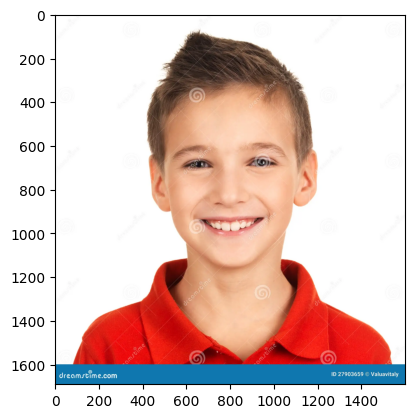

In [25]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [26]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if faceCascade.empty():
    print("Error loading cascade classifier")

In [27]:
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(1690, 1600)

In [39]:
faces = faceCascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))

if len(faces) == 0:
    print("No faces detected.")
    face_roi = None
else:
    print(f"Faces detected: {len(faces)}")

    for (x, y, w, h) in faces:
        cv2.rectangle(test_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face_roi = test_img[y:y+h, x:x+w]

Faces detected: 1


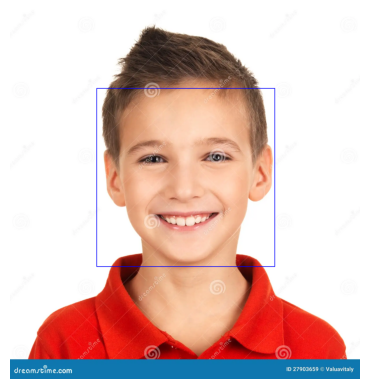

In [40]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

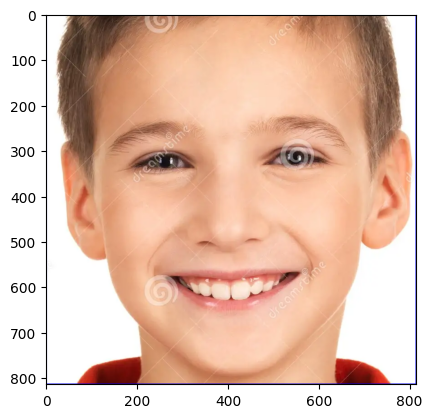

In [41]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

#### Testing the model

In [42]:
final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/225.0

In [43]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Data Science Projects/Real Time Emotion Detection/model.keras')
test_pred = model.predict(final_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [44]:
test_pred

array([[1.2888186e-04, 6.0343473e-07, 4.1781942e-04, 9.7126627e-01,
        2.6899042e-02, 8.5303956e-04, 4.3437027e-04]], dtype=float32)

#### Now we will use opencv to make a live video emotion detecter.

#### This code block can be run to test the application.

In [19]:
import os

# Get the current working directory
print("Current working directory:", os.getcwd())

# Change to the child directory 'my_directory'
os.chdir("Real Time Emotion Detection")

# Verify the change
print("New working directory:", os.getcwd())

Current working directory: C:\Users\rishi\Rishik\Data Science\Projects
New working directory: C:\Users\rishi\Rishik\Data Science\Projects\Real Time Emotion Detection


In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("models/model.keras")

faceCascade = cv2.CascadeClassifier(r"C:\Users\rishi\Rishik\Data Science\Projects\Real Time Emotion Detection\haarcascades\haarcascade_frontalface_default.xml")


if faceCascade.empty():
    print("Error loading cascade classifier")

font = cv2.FONT_HERSHEY_PLAIN
font_scale_face = 1.0
font_scale_emotion = 0.9
font_scale_percentage = 0.7
rectangle_bgr = (255, 255, 255)

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

cv2.namedWindow("Face Emotion Recognition", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("Face Emotion Recognition", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

last_prediction = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    all_emotions = []

    for face_number, (x, y, w, h) in enumerate(faces, start=1):
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        final_image = cv2.resize(roi_color, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image / 255.0

        Predictions = model.predict(final_image)
        emotion_index = np.argmax(Predictions)
        status = emotion_labels[emotion_index]
        status_percentage = Predictions[0][emotion_index] * 100 

        all_emotions.append(f"{status}: {status_percentage:.2f}%")

        cv2.putText(frame, f"Face #{face_number}", (x, y-10), font, font_scale_face, (255, 255, 255), 2)

        if last_prediction:
            cv2.putText(frame, f"{status}", (x, y-30), font, font_scale_emotion, (0, 255, 0), 2)
            cv2.putText(frame, f"{status_percentage:.2f}%", (x, y-50), font, font_scale_percentage, (0, 255, 0), 2)

        last_prediction = (status, status_percentage, Predictions[0])

    y_offset = 30 
    if last_prediction:
        for emotion_text in all_emotions:
            cv2.putText(frame, emotion_text, (10, y_offset), font, font_scale_percentage, (255, 255, 255), 2)
            y_offset += 30  

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━